In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
df = pd.read_csv('workout_fitness_tracker_data.csv')
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [ ]:
X = df.drop('Mood After Workout', axis=1)
y = df['Mood After Workout']


cat_features = [
    'Gender',
    'Workout Type',
    'Workout Intensity',
    'Mood Before Workout'
]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    verbose=0,
    random_seed=42
)

# Train model
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 0.335

📋 Classification Report:
               precision    recall  f1-score   support

   Energized       0.34      0.36      0.35       665
    Fatigued       0.34      0.34      0.34       664
     Neutral       0.33      0.30      0.32       671

    accuracy                           0.34      2000
   macro avg       0.33      0.34      0.33      2000
weighted avg       0.33      0.34      0.33      2000


🔍 Confusion Matrix:
 [[242 213 210]
 [231 224 209]
 [242 225 204]]


: 

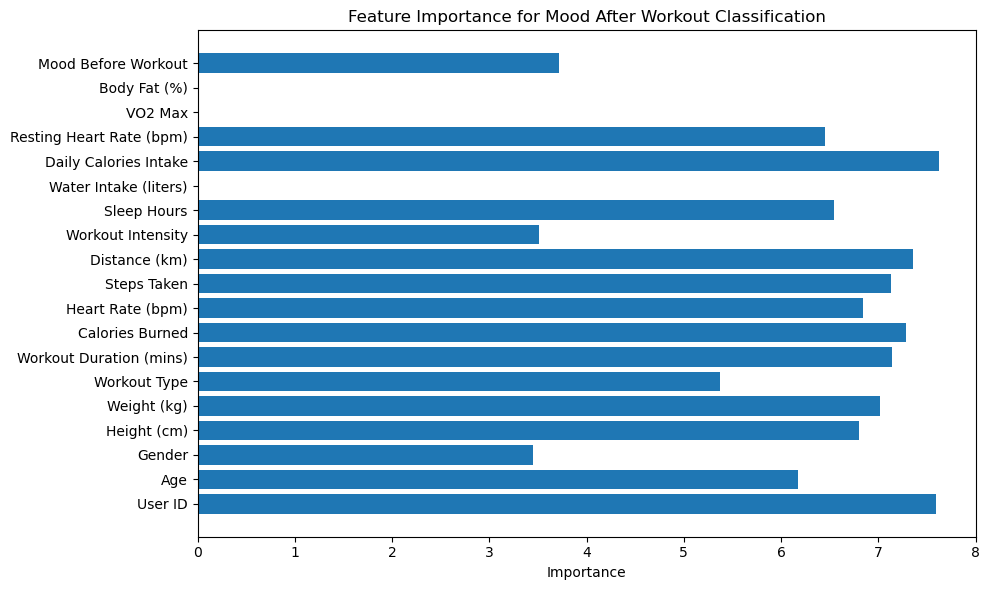

In [13]:
feature_importance = model.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance for Mood After Workout Classification")
plt.tight_layout()
plt.show()

**Lasso & Ridge**